# Tarea Analisis de Datos con Python
Realizado por José Gomez
<br>JFGPGOMEZ@GMAIL.COM

In [1]:
# Se debe instalar estas librerías para las pruebas que se hizo

#!pip install featurewiz
#!pip install sweetviz

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from featurewiz import featurewiz
import sweetviz as sv
import missingno

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import pickle

## 1) Cargar CSV

Basado en perfil integrado de observación

<br>Mean_Integrated: Media de observaciones
<br>DE: Desviación estándar de las observaciones
<br>EK: Exceso de curtosis de las observaciones
<br>Asimetría: en teoría de la probabilidad y estadística, la asimetría es una medida de la asimetría de la distribución de probabilidad de una variable aleatoria de valor real con respecto a su media. Asimetría de las observaciones.
<br>Media _ DMSNR _ Curva: Media de la CURVA DM SNR de Observaciones
<br>SD _ DMSNR _ Curva: Desviación estándar de DM SNR CURVA de Observaciones
<br>EK _ DMSNR _ Curva: Exceso de curtosis de DM CURVA SNR de Observaciones
<br>Asimetría _ DMSNR _ Curva: Asimetría de la CURVA DM SNR de Observaciones
<br>Clase: Clase 0 - 1

<b>¿QUÉ ES LA CURVA DM SNR?</b>
<br>Las ondas de radio emitidas por los púlsares llegan a la Tierra después de viajar largas distancias en un espacio lleno de electrones libres. El punto importante es que los púlsares emiten una amplia gama de frecuencias, y la cantidad en la que los electrones desaceleran la onda depende de la frecuencia. Las olas con mayor frecuencia se siembran menos en comparación con las olas con mayor frecuencia. Significa dispersión.

<b>OBJETIVO:</b>
<br>Clase
<br>0 -- No lo es
<br>1--Es

In [6]:
df = pd.read_csv("/content/drive/MyDrive/DATAPATH/Pulsar.csv")
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## 2) Usar funciones

In [7]:
def visualizar_distribuciones(df, columnas, tipo_grafico='h'):
  """
  Parametros:
    df:
      DataFrame a visualizar
    columnas:
      Columnas a ser visualizadas
    tipo_grafico ['h'|'bp']:
      Este parámetro nos permitirá visualizar las distribuciones de las variables del dataframe con la opcion 'h'
      o tambien, la distribucion de outliers con la opcion 'bp'
  """
  plt.figure(figsize=(10, 4))

  for i, col in enumerate(columnas):
    plt.subplot(2, 4, i+1)
    if tipo_grafico == 'h':
      plt.suptitle('Distribución de los datos de cada variable')
      sns.histplot(df[col])
    elif tipo_grafico == 'bp':
      plt.suptitle('Distribución de outliers de cada variable')
      sns.boxplot(df[col], orient='h')
    plt.title(f"columna: {col}")
  plt.tight_layout()
  plt.show()

In [8]:
def visualizar_distribuciones_vs_target(df):
  fig = plt.figure(figsize=(6*6, 20), dpi=100)
  palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
            '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
  for i, col in enumerate(df.columns):
      ax = plt.subplot(3, 3, i + 1)
      sns.kdeplot(
          data=df, hue='Class', fill=True,
          x=col, palette=palette[:2], legend=False
      )

      ax.set_ylabel(''); ax.spines['top'].set_visible(False),
      ax.set_xlabel(''); ax.spines['right'].set_visible(False)
      ax.set_title(f'{col}', loc='right',
                  weight='bold', fontsize=20)

  fig.suptitle(f'Features vs Class\n\n\n', ha='center',  fontweight='bold', fontsize=25)
  fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=25, ncol=3)
  plt.tight_layout()
  plt.show()

In [9]:
def train_gradient_boosting(X_train, y_train, learning_rates):
    models = []
    for rate in learning_rates:
        # Crear y entrenar un modelo de Gradient Boosting con la tasa de aprendizaje actual
        model = GradientBoostingClassifier(learning_rate=rate, random_state=42)
        model.fit(X_train, y_train)
        models.append(model)
    return models

## 3) Limpieza de Datos

In [10]:
# conteo de cada dato nulo por cada variable
df.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

<Axes: >

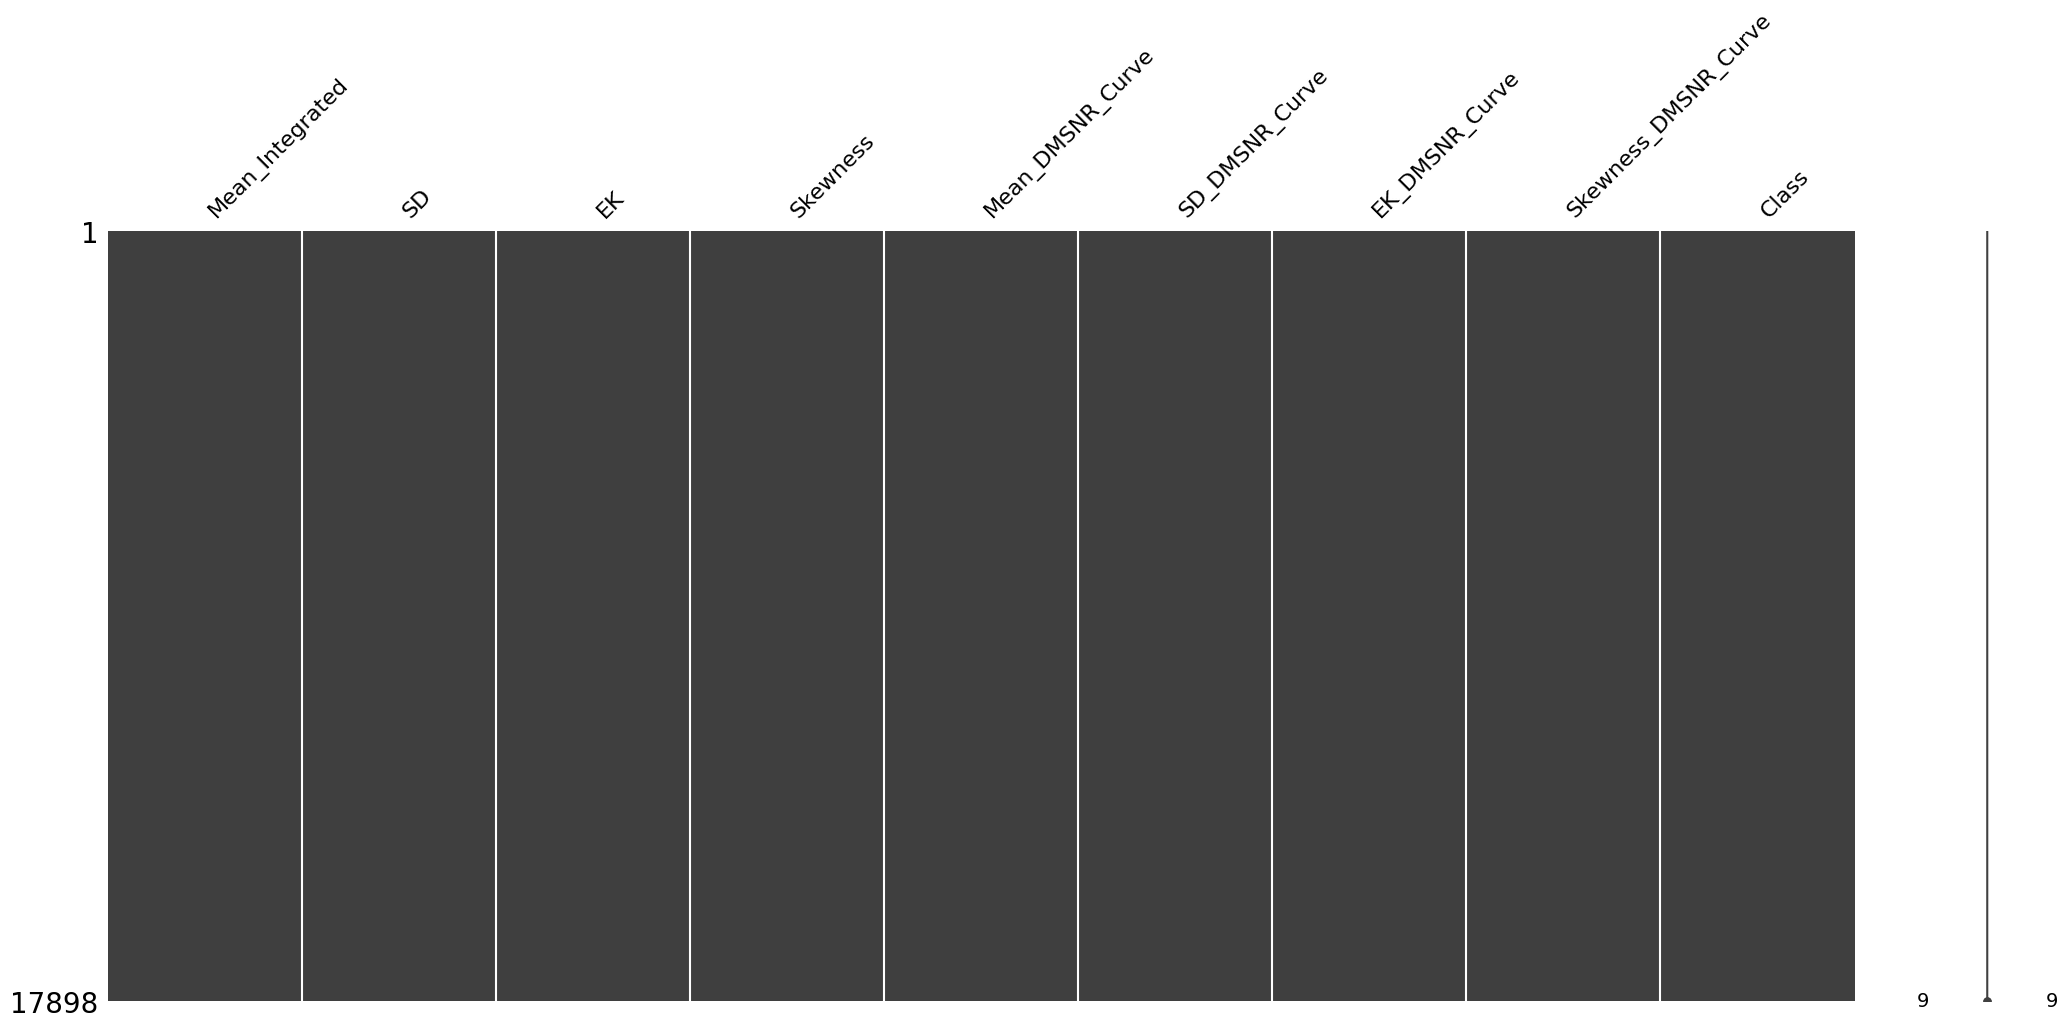

In [11]:
# Visualizacion de datos nulos
missingno.matrix(df)

## 4) Análisis de Datos

In [12]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# Tipo de variables
df.dtypes

Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

In [14]:
df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


Text(0.5, 1.0, 'Distribución Target del modelo')

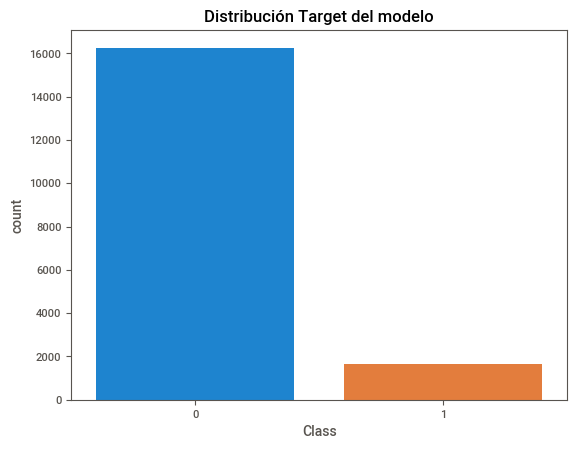

In [15]:
sns.countplot(data=df, x='Class')
plt.title("Distribución Target del modelo")

In [16]:
df.Class.value_counts('%').round(2)

0    0.91
1    0.09
Name: Class, dtype: float64

In [17]:
# Seleccion de todas las variables excepto la Clase de estrella a predecir
cols_x = [i for i in df.columns if i!='Class']

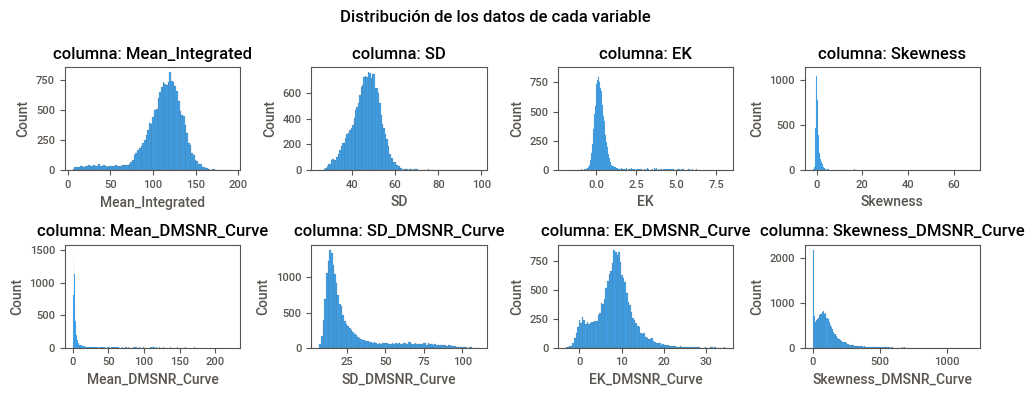

In [18]:
visualizar_distribuciones(df, cols_x, 'h')

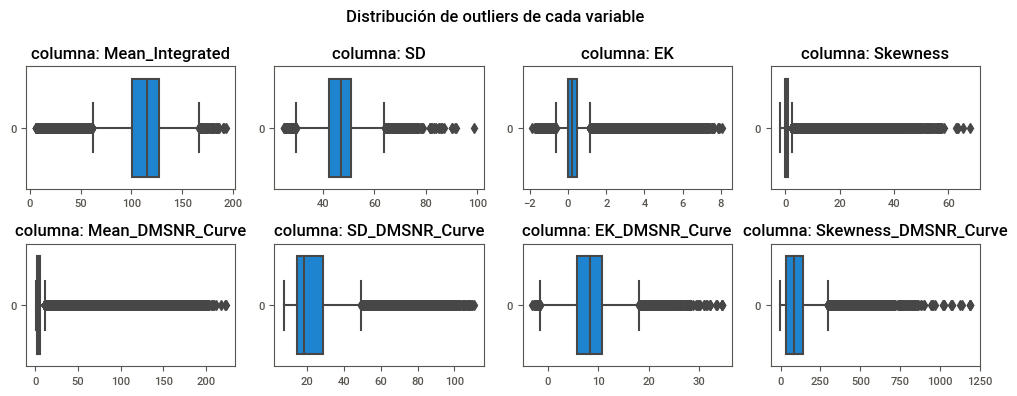

In [19]:
visualizar_distribuciones(df, cols_x, 'bp')

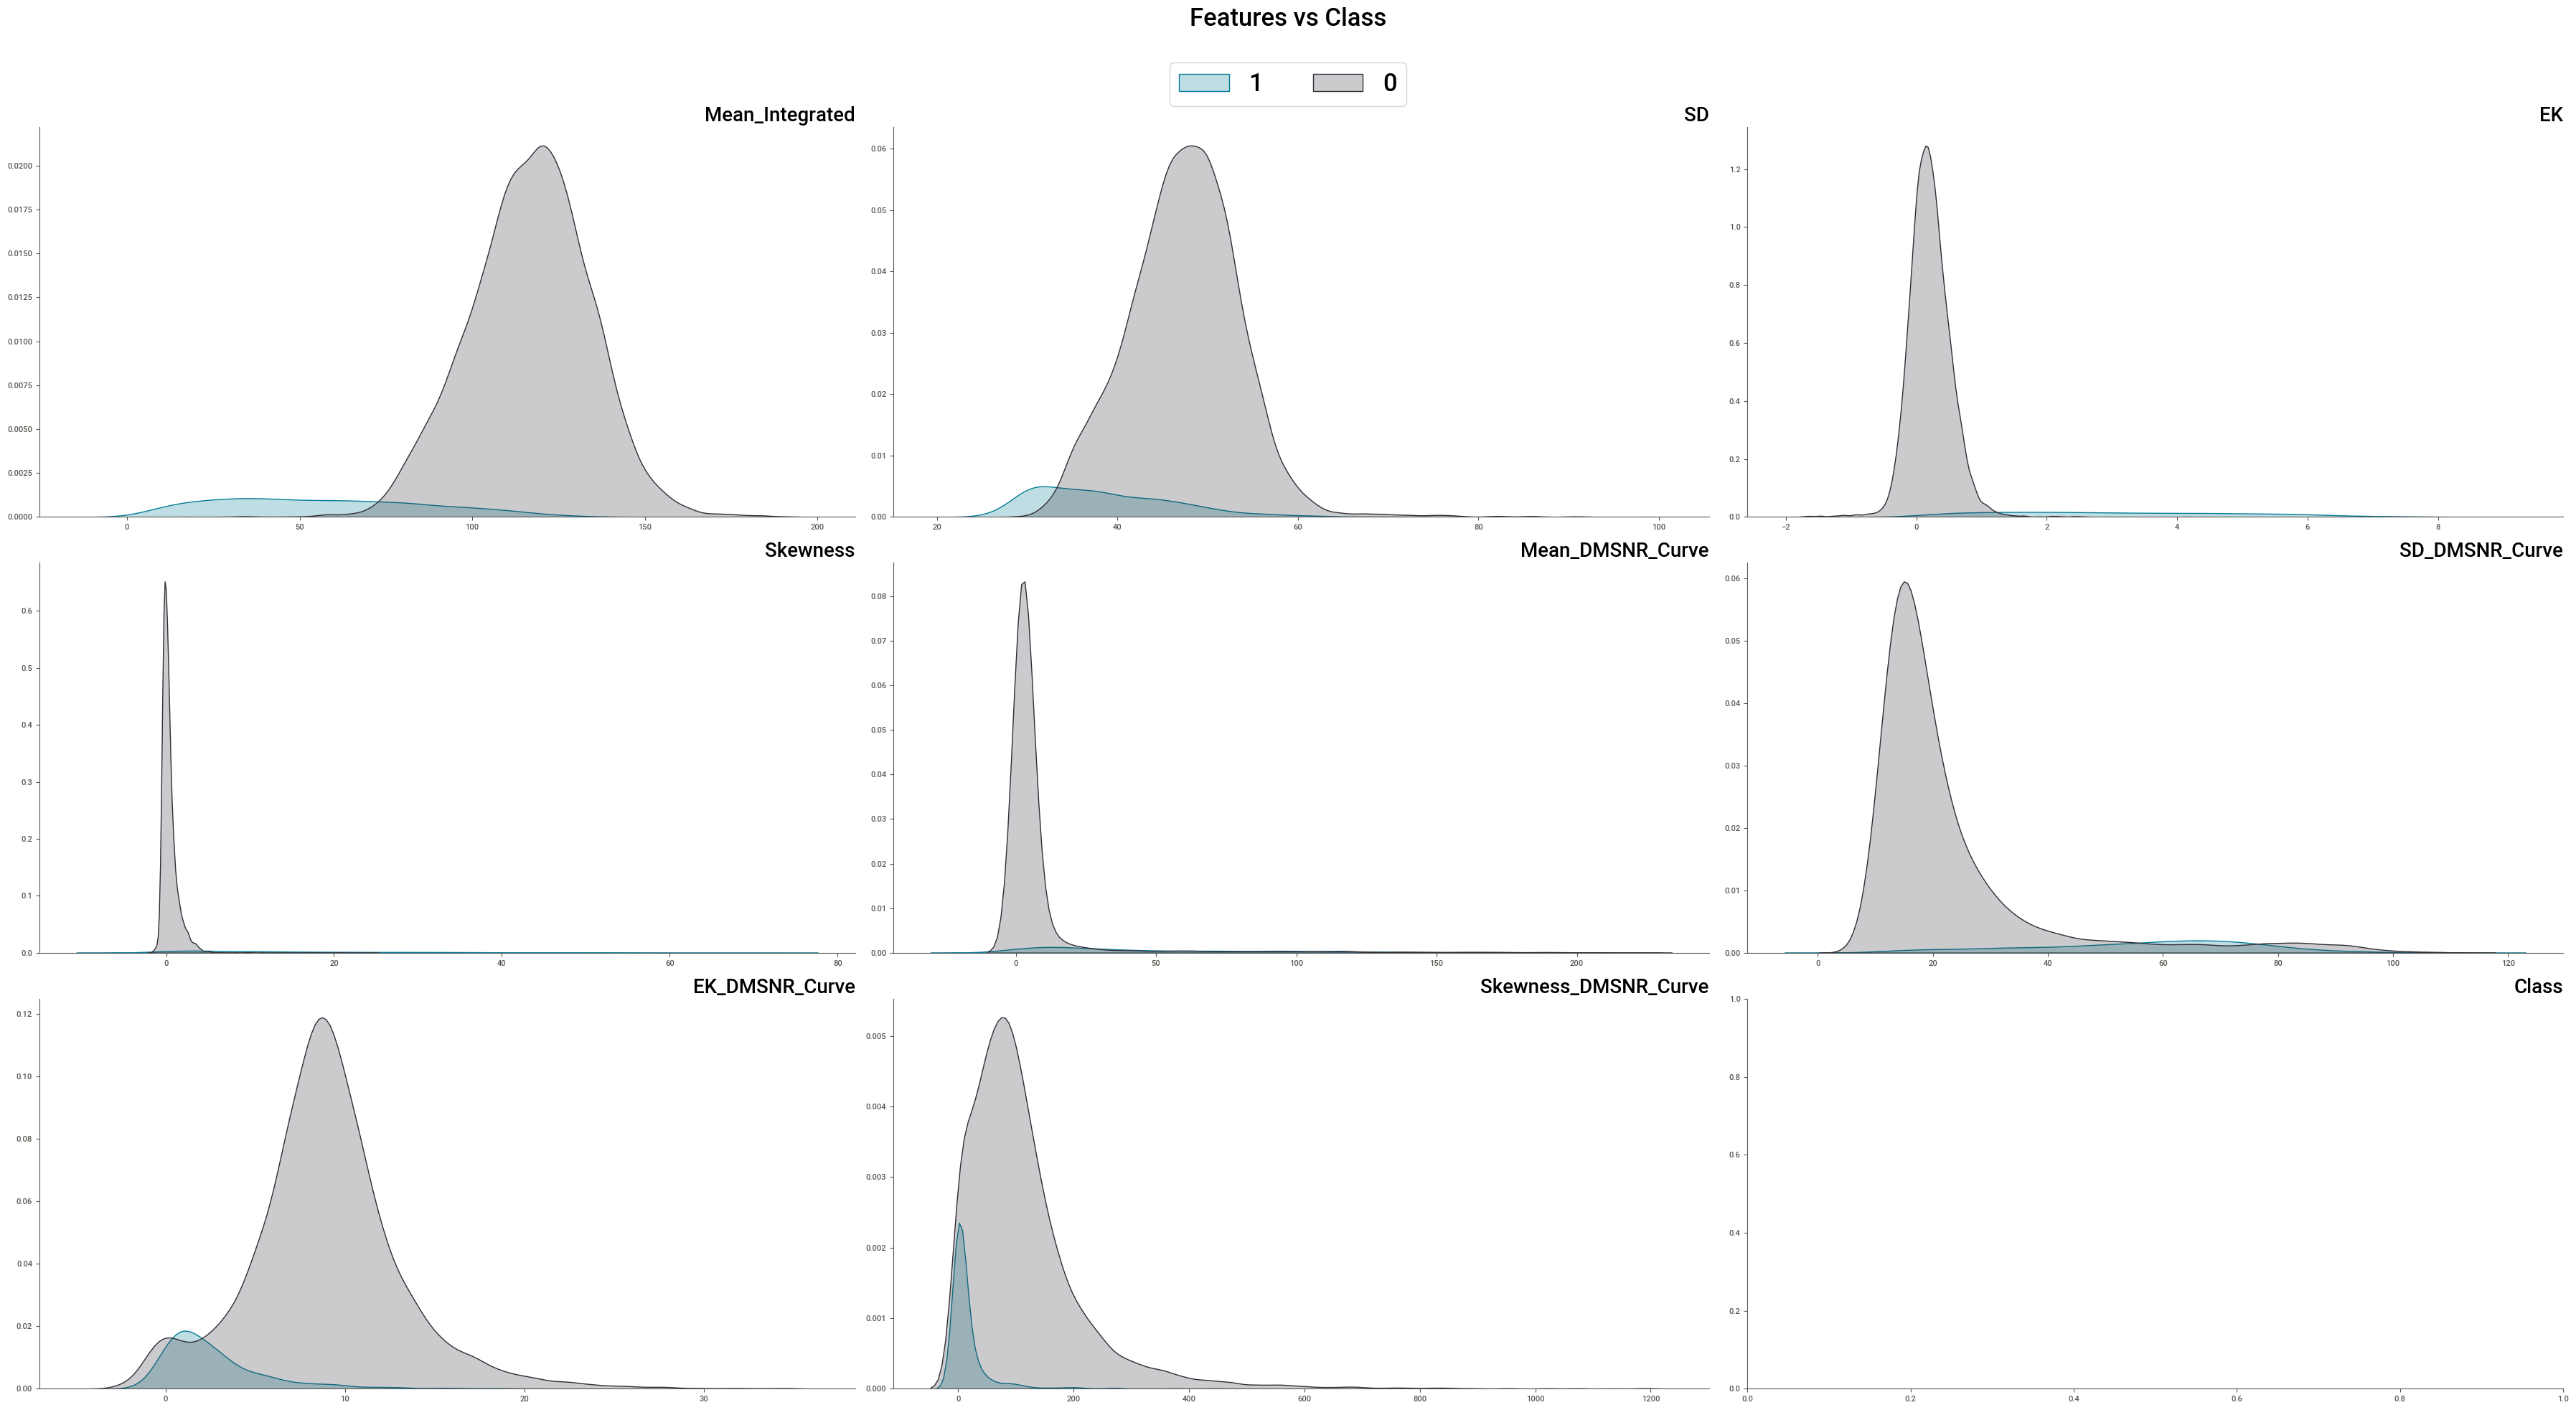

In [20]:
visualizar_distribuciones_vs_target(df)

<Axes: >

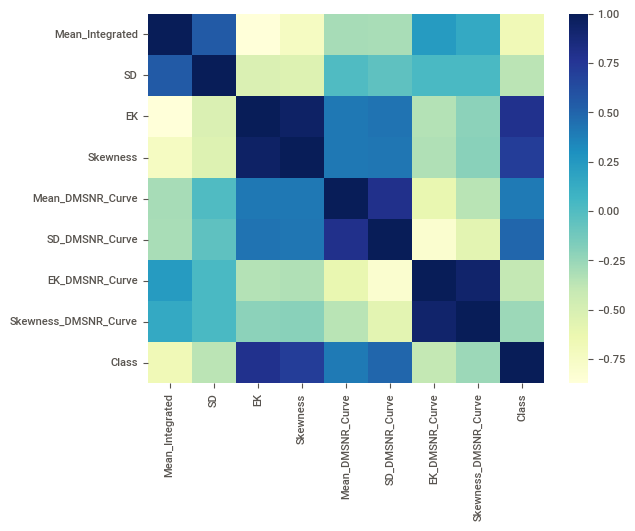

In [21]:
sns.heatmap(df.corr(), cmap="YlGnBu")

<Axes: xlabel='Skewness', ylabel='EK'>

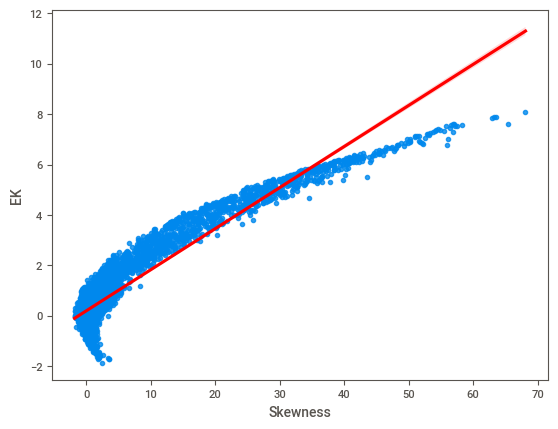

In [22]:
sns.regplot(x=df.Skewness, y=df.EK, line_kws={'color':'red'})

<Axes: >

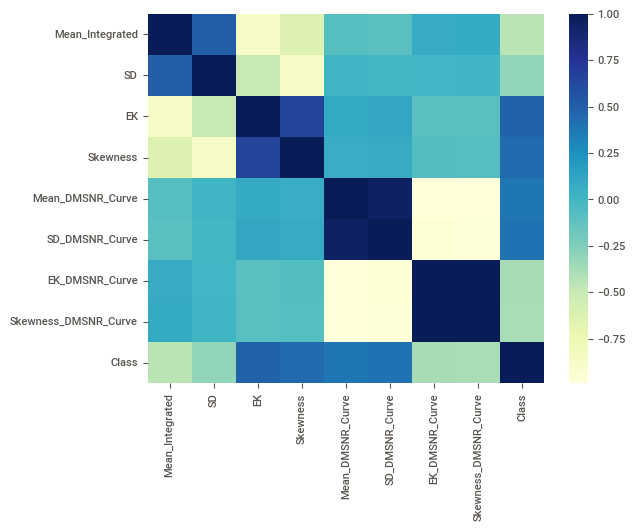

In [23]:
sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu")

## 5) Train, Val, Test split
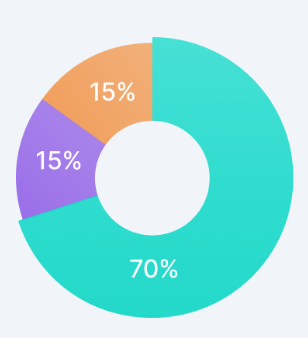

In [24]:
# x_train, y_train: Entrenamiento
# x_test, y_test: Testeo - Prueba
# x_val, y_val: Validacion


X = df.drop('Class', axis=1)
Y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=444)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=444)


In [25]:
for i in [x_train, x_test, x_val]:
  print(i.shape)

(12528, 8)
(2685, 8)
(2685, 8)


## 6) Seleccion de Variables

In [26]:
tmp = x_train.merge(y_train, right_index=True, left_index=True, how='inner')
print(tmp.shape)

(12528, 9)


In [27]:
feats = featurewiz(tmp, 'Class', corr_limit=0.7, verbose=0)
len(feats)

featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (12528, 9)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or low-information variables found in data set
Removing 0 columns from further processing sinc

2

In [44]:
variables = feats[0]
variables

['EK', 'SD_DMSNR_Curve', 'Skewness_DMSNR_Curve']

## 7) Normalizador

In [29]:
sc = StandardScaler()

In [45]:
x_train_sc = sc.fit_transform(x_train[variables])
x_test_sc = sc.transform(x_test[variables])

x_val_sc = sc.transform(x_val[variables])

## 8) Learning Rate

In [46]:
learning_rates = [0.001, 0.005, 0.01, 0.1, 0.2]
models = train_gradient_boosting(x_train_sc, y_train, learning_rates)

In [47]:
accuracies = []

for model in models:
    y_pred = model.predict(x_test_sc)

    # Calcular la precisión para el modelo actual
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

for i, accuracy in enumerate(accuracies):
    print(f'Model {i + 1} con Learning_rate: {learning_rates[i]} -- Accuracy: {accuracy:.2f}')


Model 1 con Learning_rate: 0.001 -- Accuracy: 0.91
Model 2 con Learning_rate: 0.005 -- Accuracy: 0.91
Model 3 con Learning_rate: 0.01 -- Accuracy: 0.98
Model 4 con Learning_rate: 0.1 -- Accuracy: 0.98
Model 5 con Learning_rate: 0.2 -- Accuracy: 0.98


## 9) Entrenamiento del Modelo

In [48]:

param_grid = {
    'n_estimators': [10, 100, 200, 300],
    'max_depth': [1, 3, 4, 5, 10]
}

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42)

# Crea un objeto GridSearchCV con el modelo y el conjunto de hiperparámetros
grid_search = GridSearchCV(estimator=model
                           , param_grid=param_grid
                           , scoring='accuracy'
                           , cv=3
                           , n_jobs=-1
                           )

# Entrena el modelo en los datos de entrenamiento utilizando búsqueda de cuadrícula
grid_search.fit(x_train_sc, y_train)

# Imprime la mejor combinación de hiperparámetros y su puntuación
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor precisión encontrada durante la búsqueda:")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

# Realiza predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test_sc)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

Mejores hiperparámetros encontrados:
{'max_depth': 3, 'n_estimators': 300}
Mejor precisión encontrada durante la búsqueda:
0.9782886334610472
Precisión en el conjunto de prueba: 0.98


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2456
           1       0.93      0.87      0.90       229

    accuracy                           0.98      2685
   macro avg       0.96      0.93      0.95      2685
weighted avg       0.98      0.98      0.98      2685



## 10) Testear Modelo

In [50]:
y_pred_val = best_model.predict(x_val_sc)

accuracy = accuracy_score(y_pred_val, y_val)
print(f"Precisión en el conjunto de Validación: {accuracy:.2f}")

Precisión en el conjunto de Validación: 0.98


## 11) Guardar modelo y normalizador

In [51]:
pickle.dump(best_model, open('/content/drive/MyDrive/DATAPATH/best_model.pkl', 'wb'))
pickle.dump(sc, open('/content/drive/MyDrive/DATAPATH/normalizador.pkl', 'wb'))

In [52]:
pickle.dump(x_val, open('/content/drive/MyDrive/DATAPATH/set_validacion.pkl', 'wb'))
pickle.dump(variables, open('/content/drive/MyDrive/DATAPATH/variables.pkl', 'wb'))